In [1]:
from data import Portfolio, Dataset
from utils import *
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [58]:
# define stock list of portfolio (just AAPL in this case)
stock_list = ['AAPL']

# define desired start and end dates
start = '1990-01-01'
end = '2020-01-01'

# construct pandas dataframe of portfolio returns to instantiate Portfolio object 
# (in this case from yfinance)
returns = yf.Ticker('^DJI').history(start=start,end=end)

# construct Portfolio object implemented in data.py
apple = Portfolio('^DJI', stock_list, returns, start=start,end=end)

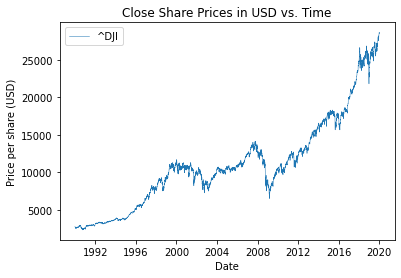

In [59]:
ax1 = apple.price_plot(['returns'],'Close',start,end)
plt.show()

In [60]:
# define feature names, target name, periods
feature_names = stock_list
target_name = 'returns'
periods = list(range(1,21)) + list(range(40,260,20))

# instantiate data object 
apple_data = Dataset(apple, 'Close', feature_names, periods, target_name)

In [61]:
print("Number of features", apple_data.n_features)
print("Number of classes", apple_data.n_classes)
print("Number of datapoints", apple_data.n_samples)

Number of features 31
Number of classes 2
Number of datapoints 7318


In [62]:
print('Number of negative movement days in ^DJI', apple_data.target[apple_data.target == 0].shape[0])
print('Number of positive movement days in ^DJI', apple_data.target[apple_data.target == 1].shape[0])

Number of negative movement days in ^DJI 3416
Number of positive movement days in ^DJI 3902


We first display summary statistics of the data:

In [63]:
df_stat = apple_data.statistics(features=['AAPL'],periods=periods)
display(df_stat)

,"(AAPL, 1)","(AAPL, 2)","(AAPL, 3)","(AAPL, 4)","(AAPL, 5)","(AAPL, 6)","(AAPL, 7)","(AAPL, 8)","(AAPL, 9)","(AAPL, 10)",...,"(AAPL, 60)","(AAPL, 80)","(AAPL, 100)","(AAPL, 120)","(AAPL, 140)","(AAPL, 160)","(AAPL, 180)","(AAPL, 200)","(AAPL, 220)","(AAPL, 240)"
count,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,...,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000
mean,0.001154,0.002292,0.003411,0.004524,0.005675,0.006827,0.007986,0.009149,0.010318,0.011471,...,0.073883,0.099019,0.123683,0.148218,0.173875,0.198956,0.224885,0.251418,0.280391,0.310418
std,0.027916,0.039183,0.047481,0.054504,0.061307,0.067325,0.072872,0.078025,0.082814,0.087204,...,0.230150,0.273480,0.314995,0.351899,0.388165,0.423372,0.458756,0.493562,0.531483,0.573164
var,0.000779,0.001535,0.002254,0.002971,0.003759,0.004533,0.005310,0.006088,0.006858,0.007605,...,0.052969,0.074791,0.099222,0.123833,0.150672,0.179244,0.210457,0.243603,0.282474,0.328516
kurtosis,24.308857,15.408718,12.211078,10.039517,9.161903,8.153538,7.666424,7.141898,6.794252,6.203791,...,1.071684,1.138089,1.372185,1.595656,1.600559,2.037434,1.871220,1.693828,1.523387,1.697021
skewness,-0.423776,-0.108108,-0.140592,-0.106306,-0.050376,-0.040497,-0.028652,-0.017691,-0.020508,-0.022545,...,0.087793,0.294262,0.529695,0.661590,0.724339,0.857841,0.914924,0.931700,0.927659,0.979758
min,-0.519637,-0.546828,-0.583082,-0.558912,-0.589124,-0.586103,-0.595166,-0.610272,-0.634441,-0.628032,...,-0.763926,-0.765306,-0.753463,-0.747253,-0.723112,-0.773438,-0.800448,-0.780303,-0.753541,-0.737892
25%,-0.012496,-0.017368,-0.020718,-0.023810,-0.026299,-0.029069,-0.032243,-0.034247,-0.035714,-0.036662,...,-0.056973,-0.066963,-0.071347,-0.076224,-0.076923,-0.075958,-0.075269,-0.085467,-0.091954,-0.110212
50%,0.000000,0.000242,0.002065,0.003675,0.006038,0.006617,0.007943,0.008670,0.009991,0.010797,...,0.074291,0.096515,0.117201,0.148913,0.166427,0.198529,0.210526,0.232128,0.258355,0.280735
75%,0.014286,0.021169,0.026538,0.031831,0.036585,0.041919,0.046550,0.052174,0.055021,0.058018,...,0.204282,0.256119,0.286050,0.316820,0.351233,0.395502,0.438962,0.482378,0.531396,0.582659


In [64]:
target = apple_data.target
target.head()

Date
1990-12-13    0
1990-12-14    0
1990-12-17    0
1990-12-18    1
1990-12-19    1
Name: returns, dtype: int64

We first GridSearch on the data until 1996 using 5-fold cross validation:

In [65]:
from sklearn.model_selection import GridSearchCV

def algorithm_pipeline(X_train_data, y_train_data, model, param_grid, cv=10, scoring_fit='roc_auc'):
    
    gs = GridSearchCV(estimator=model,param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring_fit,verbose=2)
    
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    return fitted_model

In [85]:
print(X_1996.shape)

(1276, 31)


In [66]:
from sklearn.model_selection import train_test_split

X_1996 = apple_data.data.loc['1980-01-01':'1996-01-01'].to_numpy()
y_1996 = apple_data.target.loc['1980-01-01':'1996-01-01'].to_numpy()

In [72]:
import xgboost as xgb

params = {'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [6, 10, 20, 50],'min_child_weight': [1, 2, 5, 11, 20],'colsample_bytree': [0.3, 0.4, 0.6, 0.7, 0.8]}

xgb_model = xgb.XGBClassifier(n_estimators=200, objective='binary:logistic')

model = algorithm_pipeline(X_1996, y_1996, xgb_model, params, cv=5)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.3min finished


In [73]:
print(model.best_score_)
print(model.best_params_)

0.5150270520402235
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 20}


We have now gridsearched and have our optimal parameters. Unfortunately, it doesn't seem like we do much better than random. We now train the data iteratively year by year until 2014, adding in the data from the year, and computing the feature importances at each step.

In [94]:
params = model.best_params_

xgb_model = xgb.XGBClassifier(**params)

years = list(range(1997,2014))

# initialize data
X = apple_data.data.loc['1980-01-01':'1996-01-01'].to_numpy()
y = apple_data.target.loc['1980-01-01':'1996-01-01'].to_numpy()

for year in years:
    year_X, year_y = apple_data.data.loc[f'{year}-01-01':f'{year}-12-31'].to_numpy(), apple_data.target.loc[f'{year}-01-01':f'{year}-12-31'].to_numpy()
    
    X_train, y_train = np.concatenate((X, year_X), axis=0), np.concatenate((y, year_y), axis=0)
    
    X_test, y_test = apple_data.data.loc[f'{year+1}-01-01':f'{year+1}-12-31'].to_numpy(), apple_data.target.loc[f'{year+1}-01-01':f'{year+1}-12-31'].to_numpy()
    
    xgb_model.fit(X_train, y_train)
    xgb_model.save_model(f'model_{year}.model')
    # feature importances
    xgb_model.get_booster().get_score(importance_type='weight')
    # save feature importance as a pandas dataframe
    
    # check predictions and get ROC_AUC
    xgb_model.predict(X_test, y_test)
       

In [86]:
arr = np.array([1,2,3])
arr2 = np.array([[2,3,4],[2,3,4]])

out = np.vstack((arr, arr2))
print(out)

[[1 2 3]
 [2 3 4]
 [2 3 4]]
